##### 205229119
##### Maheshvaran S
##### CIA-1

### Step1
##### Import the ‘insurance.csv’ file using pandas

In [1]:
import pandas as pd
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##### Identify the target variable and the predictors

In [2]:
data[['sex','smoker','region']].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [3]:
data['sex'] = data['sex'].apply({'male':0,'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1,'no':0}.get)
data['region'] = data['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


##### Univariate distributions (Visualise the continuous variables using histogram)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

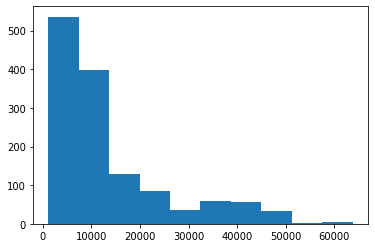

In [5]:
import matplotlib.pyplot as plt
plt.hist(x=data['charges'])

##### What can you infer about the distribution

###### The dependent variable on the left of the equal sign in linerar regression.There must be one and only one target variable in a disicision tree analysis predictor variable is a variable whose values will be used to predict the values of the variable.Univariate Data Visualization - Input (Uni-variate scatter plot using Matplotlib) ... It is used to visualize the distribution of data points of the variable. And finally get the histogram and results.

### Step2

##### Bivariate distribution (Visualise two continuous predictors using scatterplot). For example age and bmi

<AxesSubplot:xlabel='bmi', ylabel='age'>

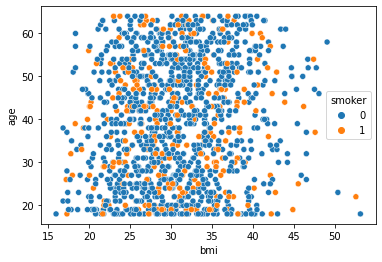

In [6]:
import seaborn as sns
sns.scatterplot(x=data['bmi'],y=data['age'],hue=data['smoker'])

##### What can you infer about the relationship of the predictors?

######  Inference and prediction both describe tasks where we learn from data in a supervised manner in order to find a model that describes the relationship between the independent variables and the outcome. Inference and prediction, however, diverge when it comes to the use of the resulting model

### Step3
##### Split the dataset into training and test set

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#features
X = data[['age','sex','bmi','children','smoker','region']]

#predicted variable
y = data['charges']

In [10]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

##### Perform linear regression on the training dataset and evaluate the model

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [18]:
len(X_test),len(X_train),len(data)

(536, 802, 1338)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:]

array([ 7610.27561662,  9727.89611811, 25209.10662983,  6478.73285892,
       13807.66805726,  4878.91393352, 33818.81316118, 15903.95676936,
        5798.94463165,  5869.27939063, 12737.76205031, 29794.57865953,
        4651.86698297, 32139.68383917,  7066.82136757, 13582.08695311,
        6197.88566451, 10352.34255323, 13048.14529677, 13856.32132157,
       15116.91169315, 14877.48783633,  8383.00309598, 35659.25501743,
        4249.07408674, 30543.54847127, 30719.12674099,  6990.85407502,
        6004.37078111,  6308.49367799,  2358.37444666, 29838.02774567,
        9799.44890047,  5784.35824839, 11506.12455585, 11695.69963677,
        9789.86203392,  5411.49937659, 13499.53394909,  7868.14875562,
        5500.62961195, 13015.76469289,  9269.11039773, 10047.86731244,
       11741.9744883 , 12868.55358066, 11883.18073496, 10683.02490613,
       11023.76300792, 11961.88061578,  4231.50451569,  1910.94908528,
       11252.77353934, 10240.02764593,  7088.29851577, 26942.28060698,
      

##### Write your inference on the model performance.

###### In previous condition to satisfy and tell about the explanation given:We can now evaluate a model using a train-test split. First, the loaded dataset must be split into input and output components. Next, we can split the dataset so that 67 percent is used to train the model and 33 percent is used to evaluate it. and the Linear Regression model is to obtain a line that best fits the data. By best fit, what is meant is that the total distance of all points from our regression line ... Commonly 70–80% of the data is taken as the training dataset while the ... The performance of the model can be evaluated and get the result and apply the code get the result.